In [1]:
from navec import Navec
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from TextDataset import TextDataset
from lib import vectorize_batch, train_val_test
from models.rnn_models import CreateRNN, MyGRU

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

N = 25000
EPOCHS = 5
batch_size = 128
vocab_length = 500002

In [3]:
navec = Navec.load("../models/navec_hudlit_v1_12B_500K_300d_100q.tar")

In [4]:
train_dataset, test_dataset  = TextDataset('../data/data.csv', N, 0.8, "head"), TextDataset('../data/data.csv', N, 0.2, "tail")
train_dataset, val_dataset = random_split(train_dataset, [0.8, 0.2])

train_loader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=vectorize_batch, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, collate_fn=vectorize_batch)
val_loader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=vectorize_batch)

In [ ]:
# for X, Y in train_loader:
#     # print(X.shape, Y.shape)
#     break

# embeddings = nn.Embedding(num_embeddings=vocab_length, embedding_dim=300)(X)

# print(embeddings.shape) # для всех батчей для всех предложений в батче для всех слов в предложении
# print(embeddings[:, 2, :].shape) # для всех батчей для одного предложения для всех слов в предложении

# # torch.randn(3, 128, 50)[1][4].shape

torch.Size([128, 310, 300])
torch.Size([128, 300])


In [6]:
rnn = CreateRNN(nn.RNN).to(device)
lstm = CreateRNN(nn.LSTM).to(device)
gru = CreateRNN(nn.GRU).to(device)
mygru = CreateRNN(MyGRU).to(device)

c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/5; train_loss=1.6899; train_acc=0.5784; train_prec=0.3345; train_rec=0.5784; train_f1=0.4239; val_loss=1.3697; val_acc=0.5903; val_prec=0.3484; val_rec=0.5903; val_f1=0.4382


c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 2/5; train_loss=1.3807; train_acc=0.5784; train_prec=0.3345; train_rec=0.5784; train_f1=0.4239; val_loss=1.3636; val_acc=0.5903; val_prec=0.3484; val_rec=0.5903; val_f1=0.4382


c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 3/5; train_loss=1.3793; train_acc=0.5784; train_prec=0.3345; train_rec=0.5784; train_f1=0.4239; val_loss=1.3693; val_acc=0.5903; val_prec=0.3484; val_rec=0.5903; val_f1=0.4382


c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 4/5; train_loss=1.3794; train_acc=0.5784; train_prec=0.3345; train_rec=0.5784; train_f1=0.4239; val_loss=1.3664; val_acc=0.5903; val_prec=0.3484; val_rec=0.5903; val_f1=0.4382


c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 5/5; train_loss=1.3790; train_acc=0.5784; train_prec=0.3345; train_rec=0.5784; train_f1=0.4239; val_loss=1.3672; val_acc=0.5903; val_prec=0.3484; val_rec=0.5903; val_f1=0.4382
test_loss=1.3930; test_acc=0.5796; test_prec=0.3359; test_rec=0.5796; test_f1=0.4253


c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


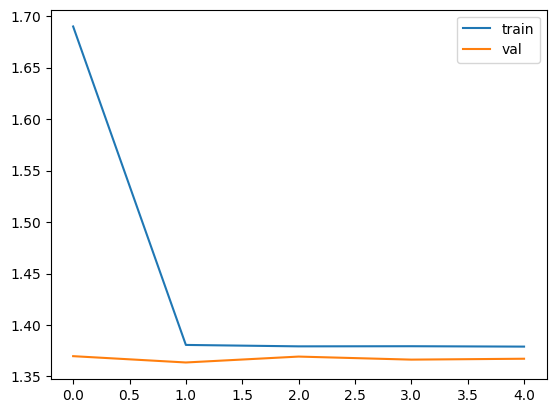

In [7]:
train_val_test(EPOCHS, train_loader, val_loader, test_loader, mygru, device)

c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/5; train_loss=1.4496; train_acc=0.5713; train_prec=0.3935; train_rec=0.5713; train_f1=0.4253; val_loss=1.3650; val_acc=0.5903; val_prec=0.3484; val_rec=0.5903; val_f1=0.4382


c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 2/5; train_loss=1.3790; train_acc=0.5784; train_prec=0.3345; train_rec=0.5784; train_f1=0.4239; val_loss=1.3657; val_acc=0.5903; val_prec=0.3484; val_rec=0.5903; val_f1=0.4382


c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 3/5; train_loss=1.3804; train_acc=0.5784; train_prec=0.3345; train_rec=0.5784; train_f1=0.4239; val_loss=1.3635; val_acc=0.5903; val_prec=0.3484; val_rec=0.5903; val_f1=0.4382


c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 4/5; train_loss=1.3801; train_acc=0.5784; train_prec=0.3345; train_rec=0.5784; train_f1=0.4239; val_loss=1.3655; val_acc=0.5903; val_prec=0.3484; val_rec=0.5903; val_f1=0.4382


c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 5/5; train_loss=1.3801; train_acc=0.5784; train_prec=0.3345; train_rec=0.5784; train_f1=0.4239; val_loss=1.3649; val_acc=0.5903; val_prec=0.3484; val_rec=0.5903; val_f1=0.4382
test_loss=1.3909; test_acc=0.5796; test_prec=0.3359; test_rec=0.5796; test_f1=0.4253


c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


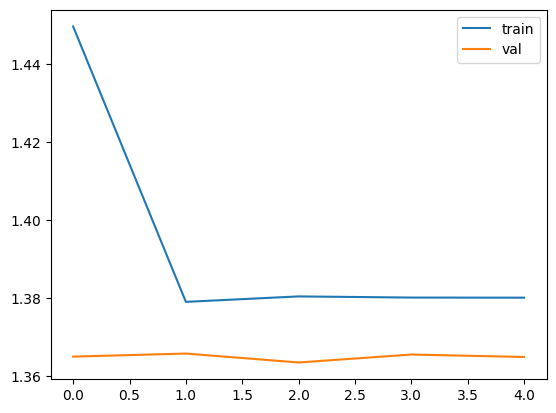

In [8]:
train_val_test(EPOCHS, train_loader, val_loader, test_loader, rnn, device)

c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/5; train_loss=1.5450; train_acc=0.5504; train_prec=0.3343; train_rec=0.5504; train_f1=0.4159; val_loss=1.3648; val_acc=0.5903; val_prec=0.3484; val_rec=0.5903; val_f1=0.4382


c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 2/5; train_loss=1.3795; train_acc=0.5784; train_prec=0.3345; train_rec=0.5784; train_f1=0.4239; val_loss=1.3656; val_acc=0.5903; val_prec=0.3484; val_rec=0.5903; val_f1=0.4382


c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 3/5; train_loss=1.3791; train_acc=0.5784; train_prec=0.3345; train_rec=0.5784; train_f1=0.4239; val_loss=1.3741; val_acc=0.5903; val_prec=0.3484; val_rec=0.5903; val_f1=0.4382


c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 4/5; train_loss=1.3805; train_acc=0.5784; train_prec=0.3345; train_rec=0.5784; train_f1=0.4239; val_loss=1.3646; val_acc=0.5903; val_prec=0.3484; val_rec=0.5903; val_f1=0.4382


c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 5/5; train_loss=1.3794; train_acc=0.5784; train_prec=0.3345; train_rec=0.5784; train_f1=0.4239; val_loss=1.3631; val_acc=0.5903; val_prec=0.3484; val_rec=0.5903; val_f1=0.4382
test_loss=1.3902; test_acc=0.5796; test_prec=0.3359; test_rec=0.5796; test_f1=0.4253


c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


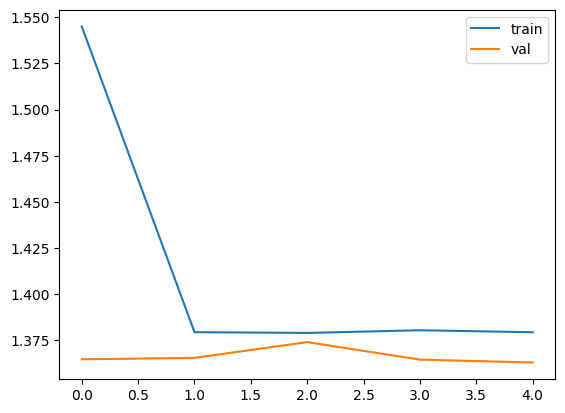

In [9]:
train_val_test(EPOCHS, train_loader, val_loader, test_loader, lstm, device)

c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/5; train_loss=1.4416; train_acc=0.5729; train_prec=0.4291; train_rec=0.5729; train_f1=0.4403; val_loss=1.1882; val_acc=0.6805; val_prec=0.5830; val_rec=0.6805; val_f1=0.6245


c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 2/5; train_loss=0.9766; train_acc=0.7483; train_prec=0.6337; train_rec=0.7483; train_f1=0.6827; val_loss=0.9001; val_acc=0.7630; val_prec=0.6600; val_rec=0.7630; val_f1=0.7012


c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 3/5; train_loss=0.7372; train_acc=0.8116; train_prec=0.7268; train_rec=0.8116; train_f1=0.7595; val_loss=0.7312; val_acc=0.8123; val_prec=0.7364; val_rec=0.8123; val_f1=0.7708


c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 4/5; train_loss=0.5485; train_acc=0.8566; train_prec=0.8015; train_rec=0.8566; train_f1=0.8212; val_loss=0.6570; val_acc=0.8345; val_prec=0.7799; val_rec=0.8345; val_f1=0.8039


c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 5/5; train_loss=0.4244; train_acc=0.8887; train_prec=0.8485; train_rec=0.8887; train_f1=0.8676; val_loss=0.6203; val_acc=0.8442; val_prec=0.8054; val_rec=0.8442; val_f1=0.8237
test_loss=0.6220; test_acc=0.8314; test_prec=0.7922; test_rec=0.8314; test_f1=0.8106


c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


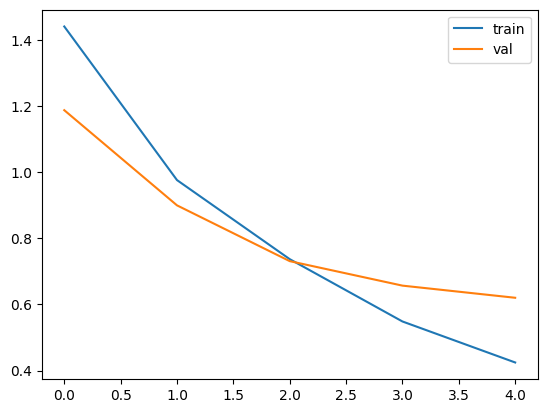

In [10]:
train_val_test(EPOCHS, train_loader, val_loader, test_loader, gru, device)